We want to examine linear spreading speeds, in this case, on the line graph, for small $p = O(\epsilon)$. This is largely a modification of the Bakhshi survey.

In [34]:
# Importin my needed libraries
import numpy as np 
from matplotlib import pyplot as plt
import networkx as nx
import DynaNet
import Equations
%matplotlib notebook

from numpy import linalg

C:\Users\wrmag\anaconda3\envs\DynaEnv\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in power


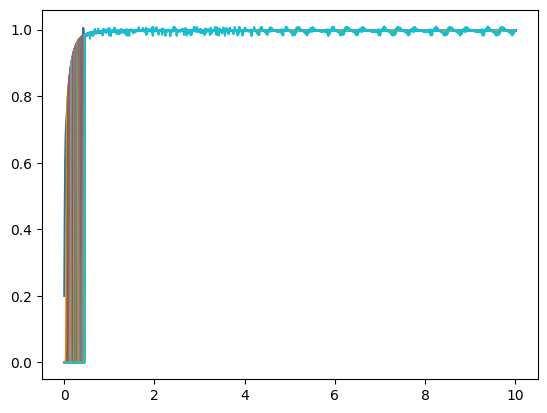

In [31]:
# Set graph parameters
graph_size = 100

# Line graphs
ident = np.identity(graph_size)
adj = np.roll(ident, 1) + np.roll(ident, -1) 
adj[0, 0] = 0
adj[graph_size-1, graph_size-1] = 0
online, offline = adj, adj
#print(adj)

# Create a multiplexed dynamic graph model
MG = DynaNet.MultiplexDynaNet([online, offline])
MG.generate_incidence()
MG.generate_laplacian()
MG.generate_multi_laplacian()

# Set up our multiplexed Fisher-KPP equation
MDE = Equations.MultiplexFisherKPPStep

# Set up equation parameters
ks = np.array([-0.001 for ii in range(graph_size)] + [-20 for ii in range(graph_size)])
vs = np.zeros(2*graph_size)
epsilon = 0.1

def coupling(state):
    p = 0.1
    omega = 100
    alpha, theta = 1, 1
    gamma = 1000
    beta = 20
    u = state[:graph_size]
    v = state[graph_size:]
    u_next = omega*(-u + gamma*u*(1-u)/(1+np.exp(-beta*(v-alpha))))
    v_next = 1-v*theta*(1+u)**p
    return np.concatenate((u_next, v_next))

# Set up initial conditions
t0 = 0
tf = 10
nt = 1000
A, k, B = 0.2, 10, .7
u0 = A*np.exp(-k*np.arange(graph_size))
v0 = B*np.ones(graph_size)
f0 = np.concatenate((u0, v0))

# Run simulation
MG.solve_ivp(MDE, f0, t0, tf, nt, ks, vs, coupling)
res = MG.solve_ivp_results

for ii in range(graph_size):
    plt.plot(res.t, res.y[ii, :], label=f'{ii}')
    #plt.legend()
plt.show()

Lets focus on the $u$ field, or the social tension. For small $p$, the social unrest, $v$ is nearly decoupled from $u$. Recall, that for $p=0$, if $\frac{\Gamma}{2}-\omega < 0$, then our linear spreading speed can not be defined, but we may still be able to define a selected spreading speed through thresholding.

In [32]:
def get_numeric_spreading_speed(time_results, spatial_results, thresh):
    # Take only u values from the combined vector
    u_vec = spatial_results[:graph_size, :]
    
    # Determine at which times the u is above the threshold value
    u_thresh = u_vec > thresh
    
    # Get first arriaval index from each column. Distances already in order
    first_indicies = np.argmax(u_thresh, axis=1)
    
    # Get corresponding first time
    first_times = time_results[first_indicies]
    
    return first_times
    

<IPython.core.display.Javascript object>


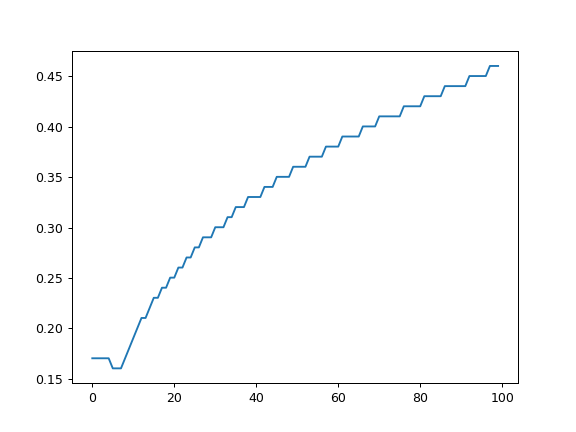

In [35]:
first_times = get_numeric_spreading_speed(res.t, res.y, 0.9)
plt.plot(first_times)

In [21]:
t[np.array([1, 2, 1])]

array([2, 3, 2])

In [36]:
1/((0.3314 - 0.4618)/60)

-460.12269938650303

- Keep with teh weak p dependence
- Will the pulse, if smaller, propogate under
- Do a parameter Survey for smaller $\Gamma$